# PCA With Unsupervised Learning



### Q. Use Unsupervised Learning Algorithms (KMeans and Agglomerative Clustering) to dataset after applying PCA.

#### Dataset - 'Wholesale customers data.csv'

In [1]:
# importing necessary directories
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm

#code to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get data from the dataset
df=pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 8)

## Preprocessing

In [5]:
# Checking for missing values
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


There are no missing values or null values and the dtypes is int64 for all 8 columns.


In [7]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [8]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [9]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


We need to further investigate for outliers. If outliers are present we need to use some kind of scaling/normalisation/standardisation technique to deal with it instead of IQR.

## Outlier Detection

In [10]:
df1 = df.copy(deep=True)

In [11]:
# dropping Channel and Region as they do not have outliers
df1.drop(df1[['Channel', 'Region']], axis=1, inplace = True)
# column names
X = df1.columns

In [12]:
df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


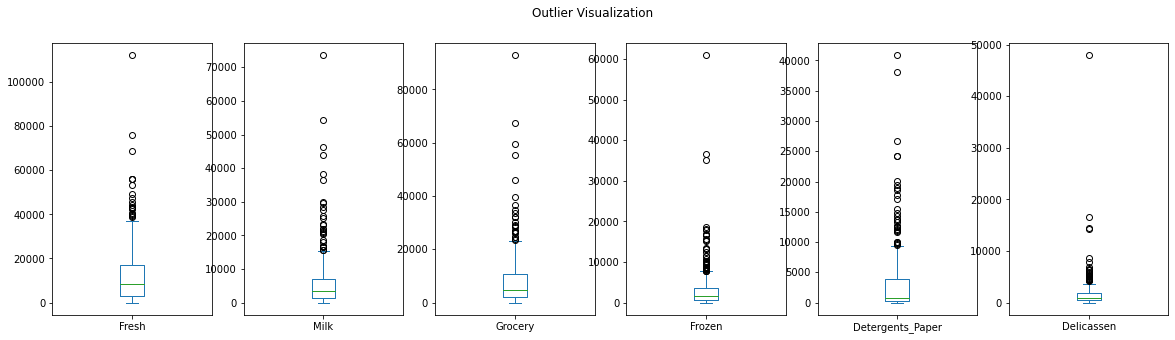

In [13]:
# outlier detection with box plot
df1.plot(kind='box', subplots=True, figsize=(20,5), title = 'Outlier Visualization')
plt.show()

Here presence of outliers is very evident. We are applying Power Transformation method which reduces skewness and varience in data.

In [14]:
# Fitting Power Transform for outlier handling
# importing PT
from sklearn.preprocessing import PowerTransformer
#instance creation
pt = PowerTransformer(method='yeo-johnson', standardize=True)
# fitting and transforming the model
df1 = pt.fit_transform(df1)

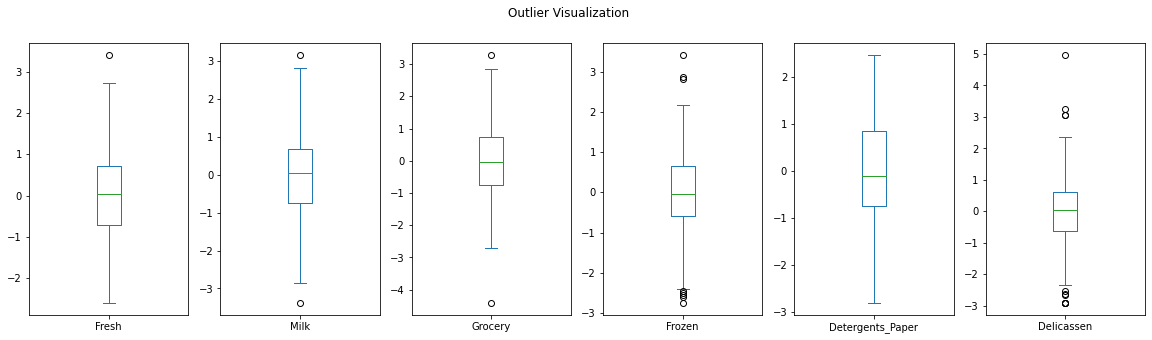

In [15]:
# Convert array to DataFrame
df1 = pd.DataFrame(df1, columns = X)
# Outlier visualization
df1.plot(kind='box', subplots=True, figsize=(20,5), title='Outlier Visualization')
plt.show()

The transformed data is again checked for outliers and shows a highly improved performance. 

Now that we have completed the handling of outliers, we can Scale the dataset using RobustScaler as it yields better results than StandardScaler in presence of outliers.

### Feature Scaling

In [16]:
# importing RobustScaler for feature scaling
from sklearn.preprocessing import RobustScaler
#instance creation
rc = RobustScaler()
# fitting and transforming the model
df1 = rc.fit_transform(df1)

In [17]:
# Convert array to DataFrame
df1 = pd.DataFrame(df1, columns = X)
df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.259493,0.658227,0.297696,-1.143251,0.444476,0.229120
1,-0.111342,0.669219,0.455508,0.091833,0.525578,0.439567
2,-0.171437,0.594600,0.308367,0.294529,0.551295,1.744429
3,0.291425,-0.695738,-0.073821,0.970231,-0.170333,0.444708
4,0.695402,0.263624,0.265292,0.623414,0.288021,1.343913


### PCA - Principal Component Analysis

#### Case 1 - Varience measure 0.95

In [18]:
# we can apply PCA only to scaled data here we apply to df1
#Importing PCA
from sklearn.decomposition import PCA
# instance creation
pca = PCA(0.95) # case 1 with varience measure 0.95
# fitting to model
pca_mod = pca.fit_transform(df1)

In [19]:
pca_mod.shape

(440, 5)

In [20]:
pca.explained_variance_ratio_

array([0.39890846, 0.31859214, 0.11523625, 0.10466457, 0.04035042])

In [21]:
# relation btw PCA components and the df cols
pd.DataFrame(pca.components_, columns=df1.columns, 
             index=['PC-1','PC-2','PC-3','PC-4','PC-5'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC-1,0.054500,-0.563707,-0.557779,0.105034,-0.473298,-0.364834
PC-2,0.511374,0.035095,-0.076703,0.670416,-0.138797,0.512503
PC-3,0.005497,0.170981,0.212680,0.603730,0.229834,-0.712873
PC-4,-0.856384,-0.042580,-0.090816,0.413572,-0.068267,0.284332
PC-5,0.038609,-0.776607,0.242700,0.062859,0.563731,0.121423


#### Case 2 - Number of components 

In [22]:
# instance creation
pca1 = PCA(n_components=2) # case 2 with components 2
# fitting to model
pca1_mod = pca1.fit_transform(df1)

In [23]:
pca1_mod.shape

(440, 2)

In [24]:
pca1.explained_variance_ratio_

array([0.39890846, 0.31859214])

In [25]:
# relation btw PCA components and the df cols
pd.DataFrame(pca1.components_, columns=df1.columns, 
             index=['PC-1','PC-2'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC-1,0.054500,-0.563707,-0.557779,0.105034,-0.473298,-0.364834
PC-2,0.511374,0.035095,-0.076703,0.670416,-0.138797,0.512503


# **Modelling**

## **K-Means**

In [26]:
# # Case 1: KMeans with PCA(varience measure 0.95)
# importing KMeans
from sklearn.cluster import KMeans
# instance creation
wcss = [] #creating varable for storing cluster values
for i in np.arange(1,12,1,int):
  K = KMeans(n_clusters=i, init='k-means++',random_state=42)
  K.fit(pca_mod)
  wcss.append(K.inertia_)

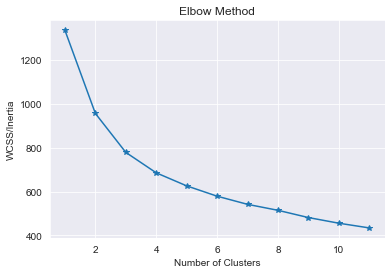

In [27]:
# plot Elbow Method
sns.set_style('darkgrid')
plt.plot(np.arange(1,12,1,int), wcss, marker = '*')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS/Inertia')
plt.title('Elbow Method')
plt.show()

Number of clusters is identified as 6 from here.

In [28]:
# # Case 2: KMeans with PCA(n_components 2)
# importing KMeans
from sklearn.cluster import KMeans
# instance creation
wcss = [] #creating varable for storing cluster values
for i in np.arange(1,12,1,int):
  K = KMeans(n_clusters=i, init='k-means++',random_state=42)
  K.fit(pca1_mod)
  wcss.append(K.inertia_)

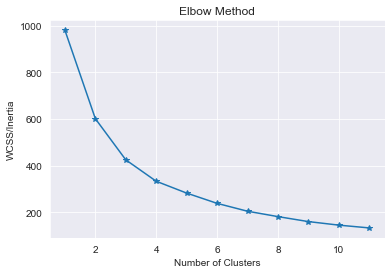

In [29]:
# plot Elbow Method
sns.set_style('darkgrid')
plt.plot(np.arange(1,12,1,int), wcss, marker = '*')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS/Inertia')
plt.title('Elbow Method')
plt.show()

Here also 6 seems to be the ideal number of clusters

#### Silhouette Score Validation

In [30]:
# Importing Silhoutte score
from sklearn.metrics import silhouette_score, silhouette_samples

For n_clusters = 2 The average silhouette_score is : 0.2757469314668275
For n_clusters = 3 The average silhouette_score is : 0.24498327041422166
For n_clusters = 4 The average silhouette_score is : 0.22511492153531779
For n_clusters = 5 The average silhouette_score is : 0.1960921139456386
For n_clusters = 6 The average silhouette_score is : 0.18951252172186545
For n_clusters = 7 The average silhouette_score is : 0.18518320393128063


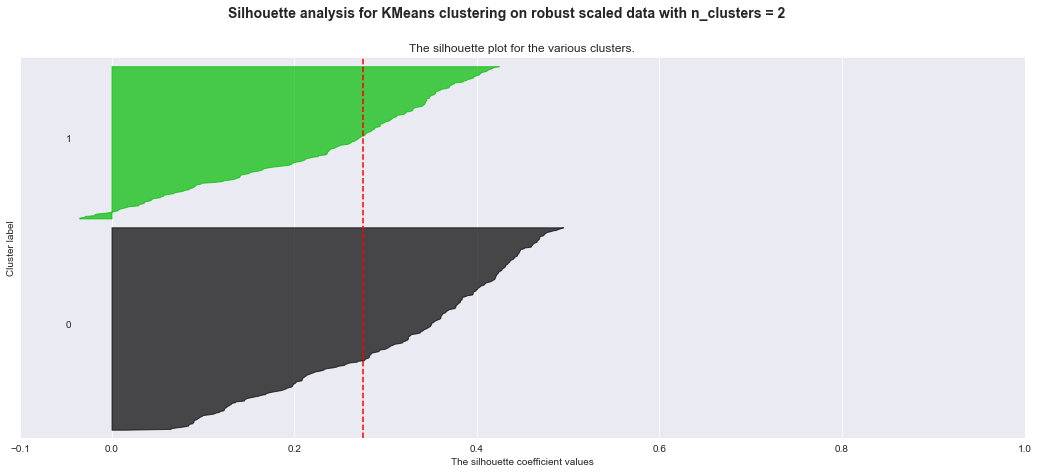

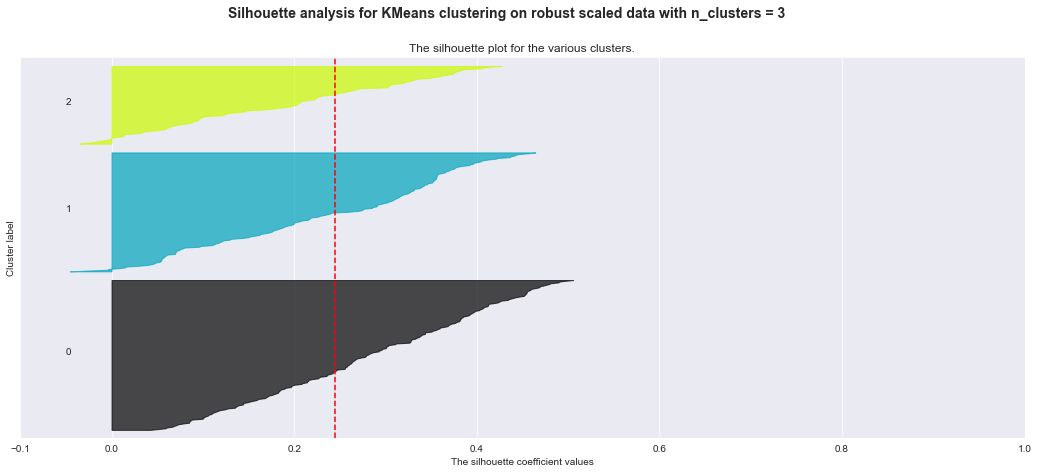

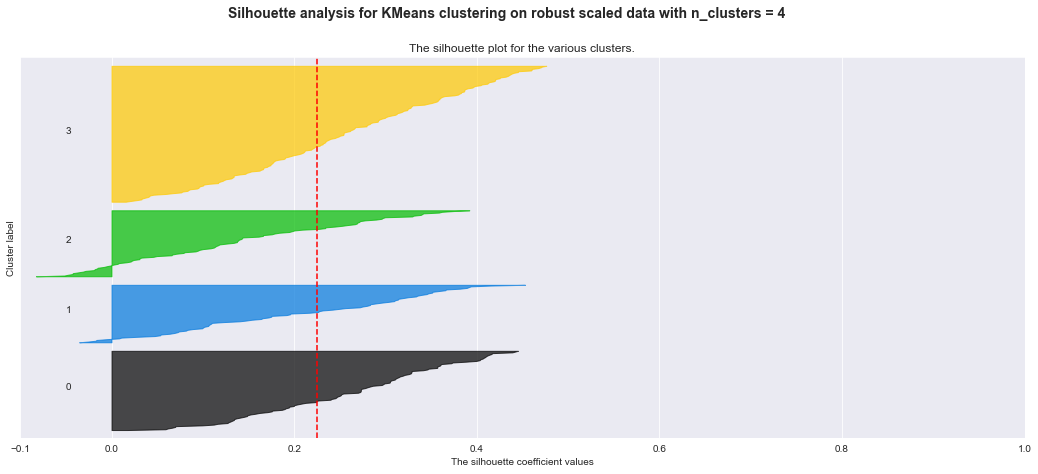

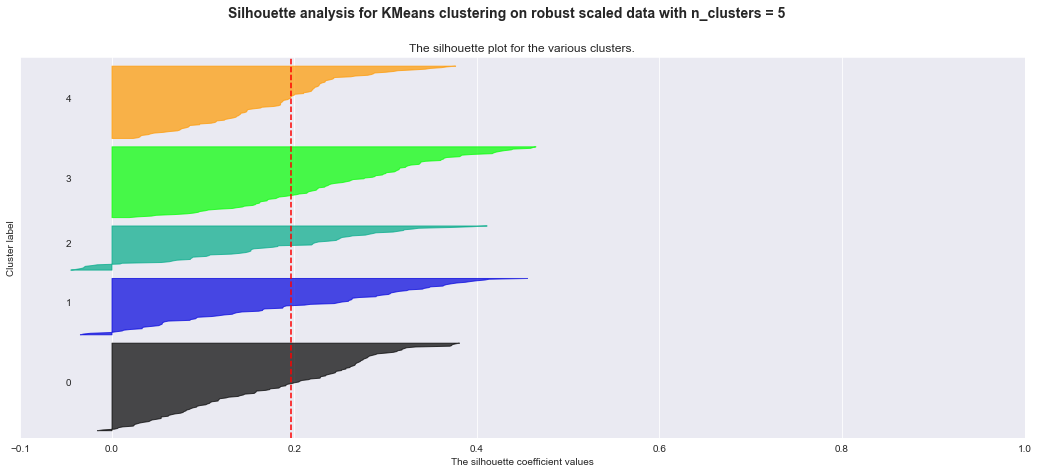

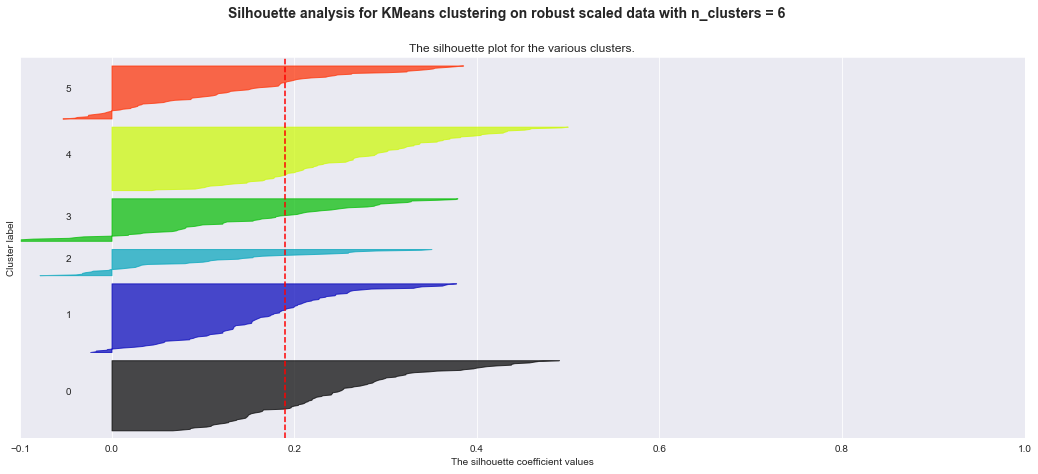

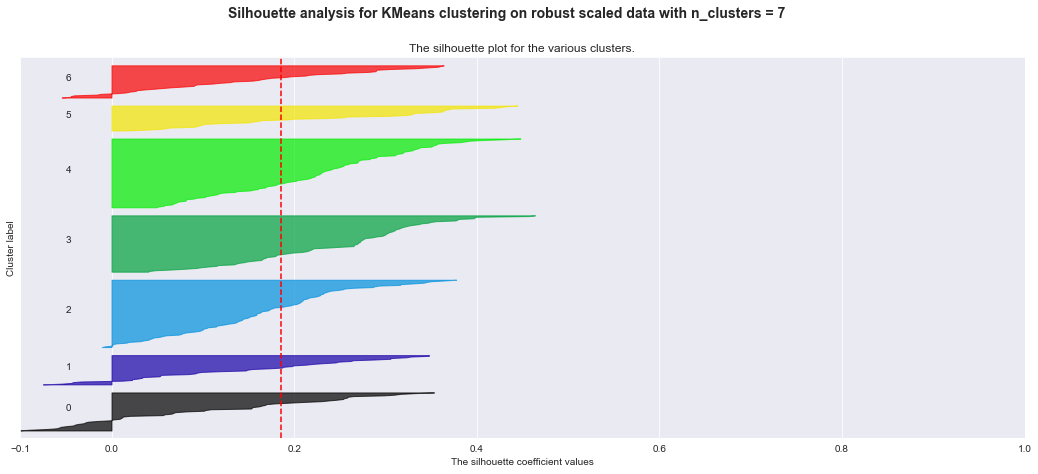

In [31]:
# # Case 1: KMeans with PCA(varience measure 0.95)
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    fig, ax1  = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The silhouette coefficient can range from -1, 1 but here all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_mod) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_mod)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_mod, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_mod, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on robust scaled data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In this case of KMeans with varience measure =0.95, the silhouette score for 6 and 7 clusters seems to be the least. Based on the thickness of the clusters we can select 6.

For n_clusters = 2 The average silhouette_score is : 0.384010550889794
For n_clusters = 3 The average silhouette_score is : 0.36925917380016143
For n_clusters = 4 The average silhouette_score is : 0.36119440365791383
For n_clusters = 5 The average silhouette_score is : 0.3420196412100588
For n_clusters = 6 The average silhouette_score is : 0.3455291297588888
For n_clusters = 7 The average silhouette_score is : 0.35923490399422237


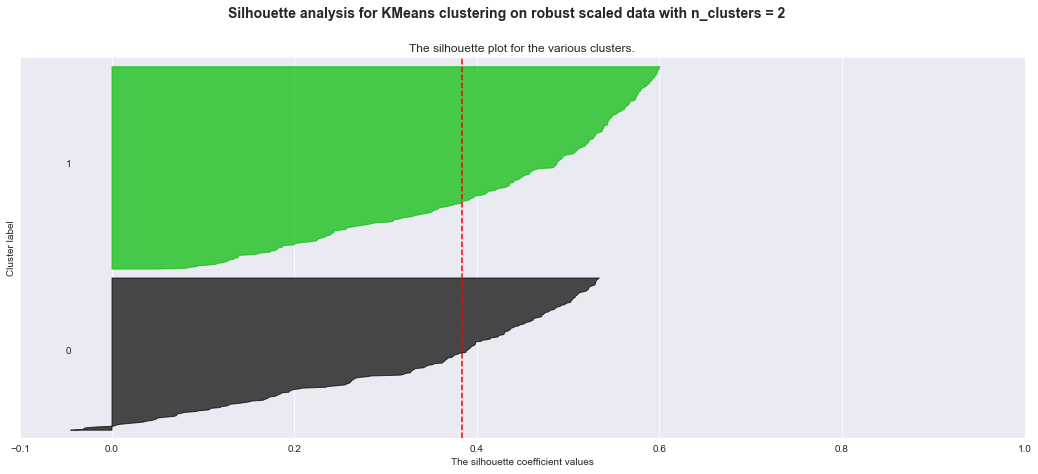

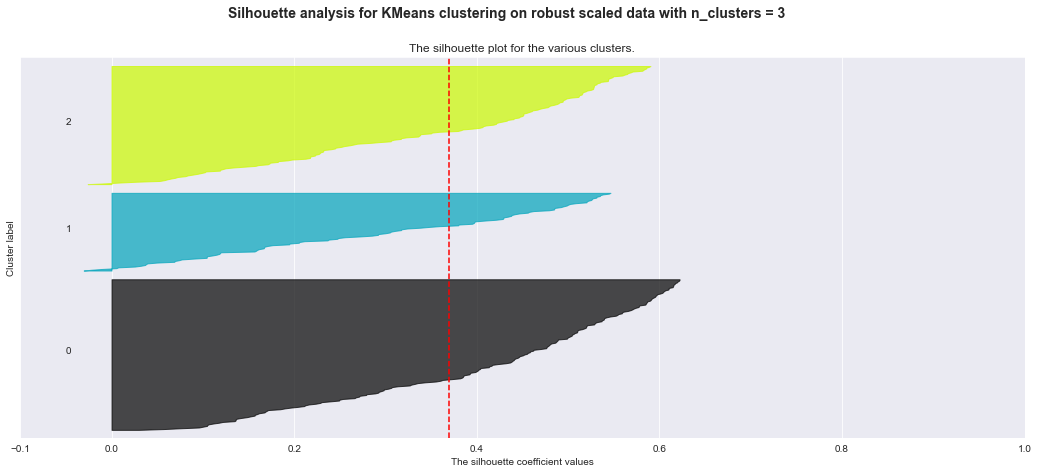

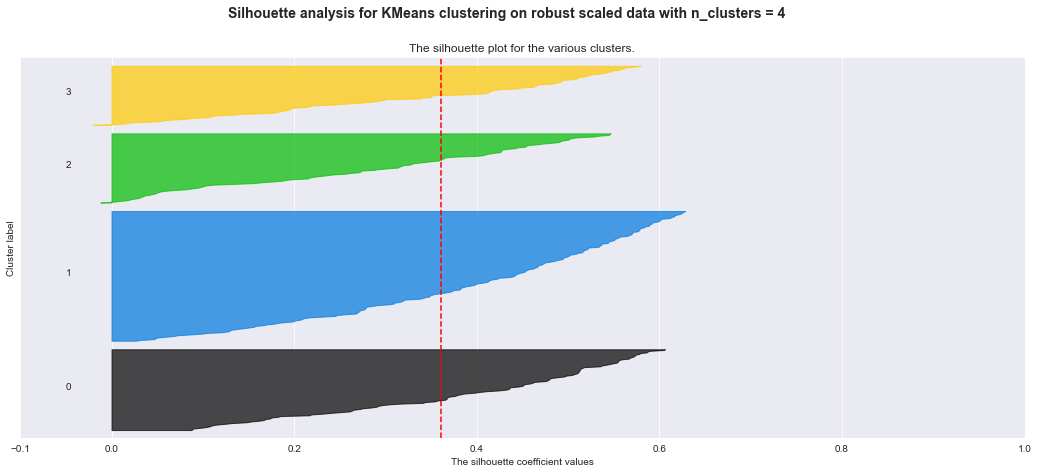

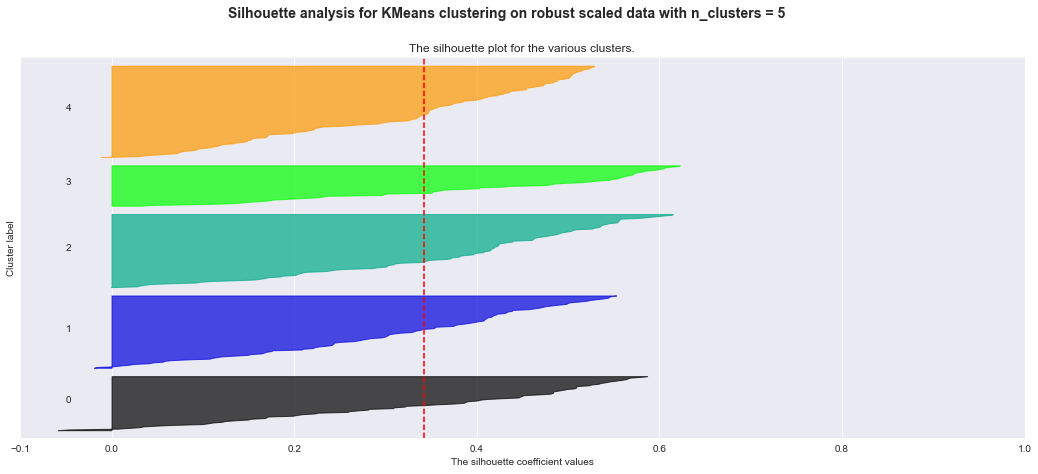

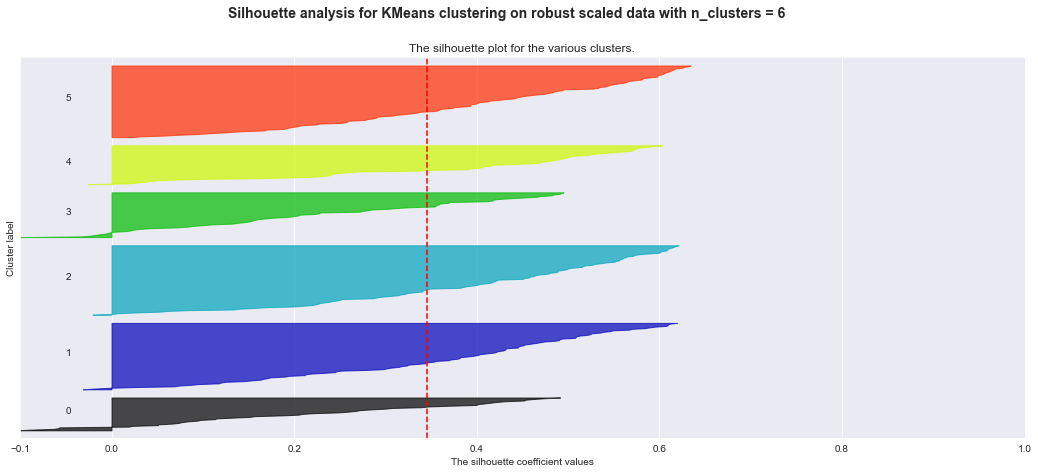

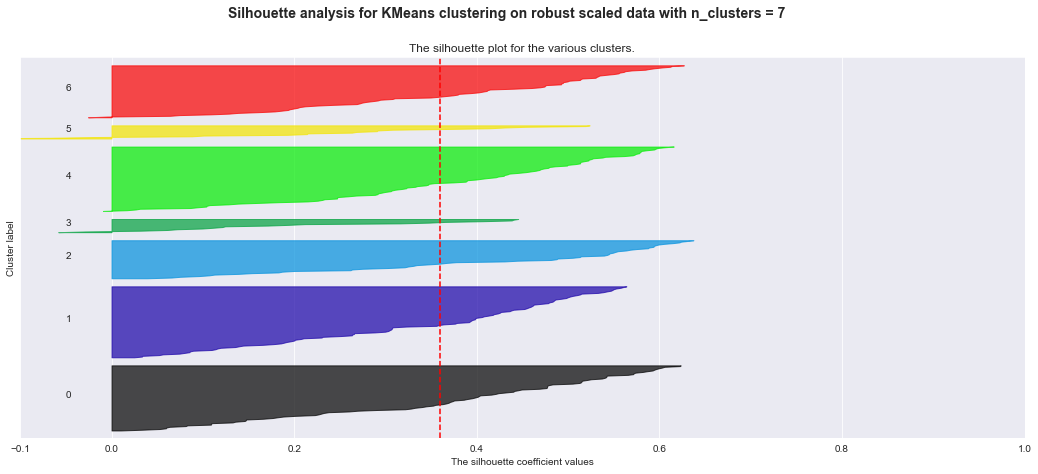

In [32]:
# # Case 2: KMeans with PCA(n_components = 2)
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    fig, ax1  = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The silhouette coefficient can range from -1, 1 but here all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_mod) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca1_mod)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca1_mod, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca1_mod, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on robust scaled data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In this case of KMeans with PCA(n_components = 2), the silhouette score for 5 and 6 clusters seems to be the least. Based on the thickness of the clusters we can select 6.

## **Hierachichal Agglomerative Clustering**

In [33]:
# importing Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

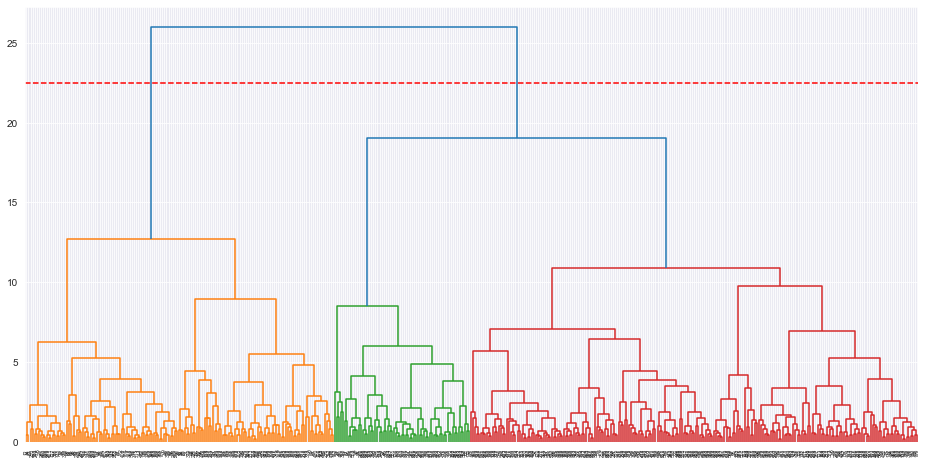

In [34]:
# # Case 1: Dendrogram with PCA(varience measure 0.95)
# optimum clustering using Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
links = linkage(pca_mod,method='ward')
plt.figure(figsize=(16,8))
dendrogram(links, orientation='top', distance_sort ='ascending', show_leaf_counts=True)
plt.hlines(22.5,0,5000, colors='r',  linestyles='dashed')
plt.show()

In this case of Agglomerative Clustering with PCA(varience measure 0.95), the Dendrogram shows ideal no of clusters as 2.

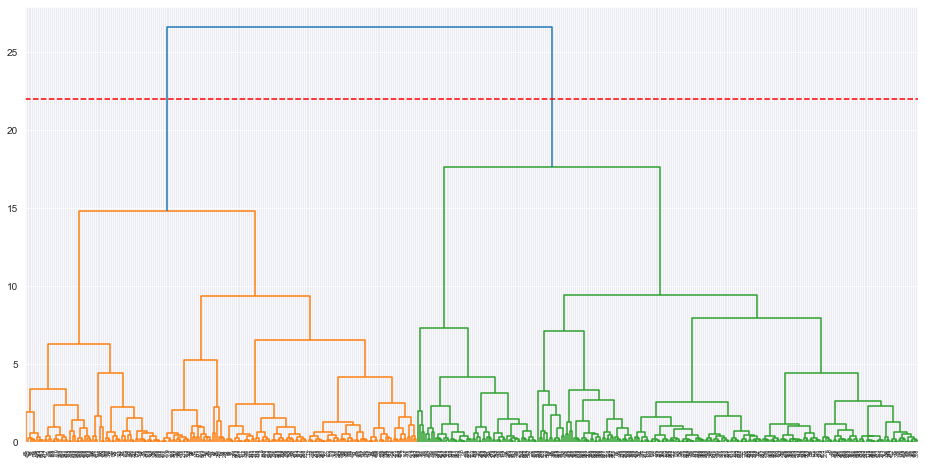

In [35]:
# # Case 2: Dendrogram with PCA(n_components = 2)
# optimum clustering using Dendrogram
links = linkage(pca1_mod,method='ward')
plt.figure(figsize=(16,8))
dendrogram(links, orientation='top', distance_sort ='ascending', show_leaf_counts=True)
plt.hlines(22,0,5000, colors='r',  linestyles='dashed')
plt.show()

In this case of Agglomerative Clustering with PCA(n_components=2), the Dendrogram shows ideal no of clusters as 2.

#### Silhouette Score Validation

For n_clusters = 2 The average silhouette_score is : 0.25464095586631613
For n_clusters = 3 The average silhouette_score is : 0.23449009921095923
For n_clusters = 4 The average silhouette_score is : 0.20257573656830077
For n_clusters = 5 The average silhouette_score is : 0.14831844162701605
For n_clusters = 6 The average silhouette_score is : 0.15064000560863733
For n_clusters = 7 The average silhouette_score is : 0.15194123375434418


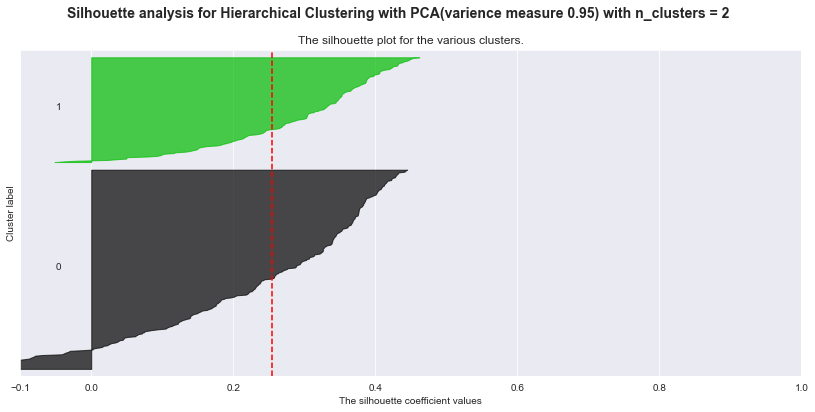

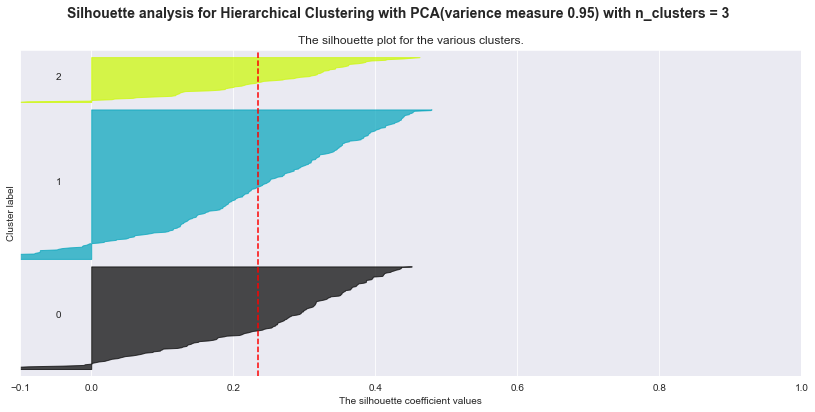

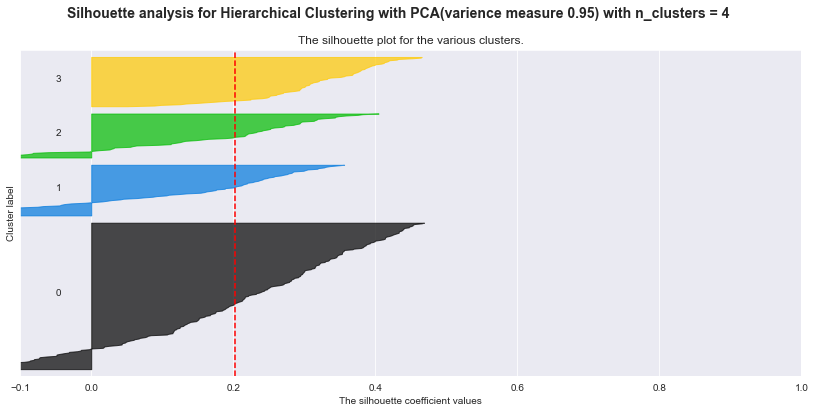

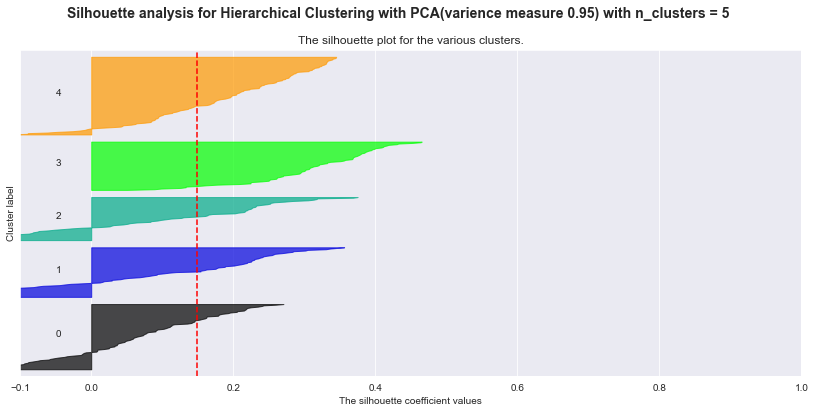

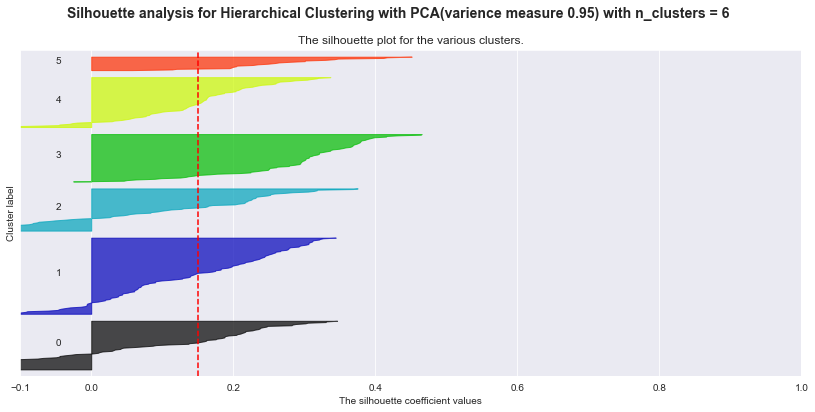

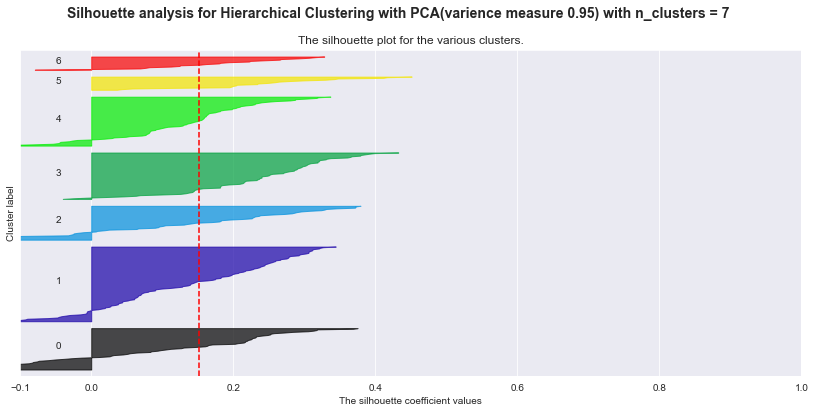

In [36]:
# # Case 1: Agglomerative Clustering with PCA(varience measure 0.95)
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1  = plt.subplots(1, 1)
    fig.set_size_inches(14, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_mod) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(pca_mod)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_mod, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_mod, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(
        "Silhouette analysis for Hierarchical Clustering with PCA(varience measure 0.95) with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In this case of Agglomerative Clustering with PCA(varience measure=0.95), the silhouette score for 5, 6 and 7 clusters seems to be the least. Based on the thickness of the clusters we can select 6.

For n_clusters = 2 The average silhouette_score is : 0.3538595130980981
For n_clusters = 3 The average silhouette_score is : 0.3349095032698264
For n_clusters = 4 The average silhouette_score is : 0.33857995787468237
For n_clusters = 5 The average silhouette_score is : 0.29635777354408077
For n_clusters = 6 The average silhouette_score is : 0.30264718589807105
For n_clusters = 7 The average silhouette_score is : 0.27551694538255445


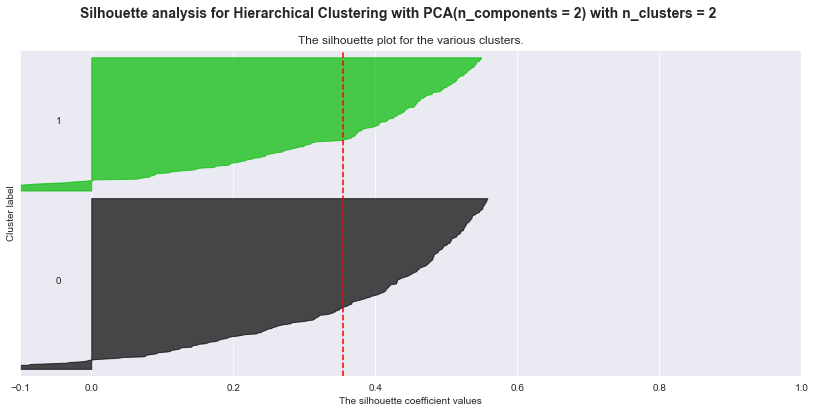

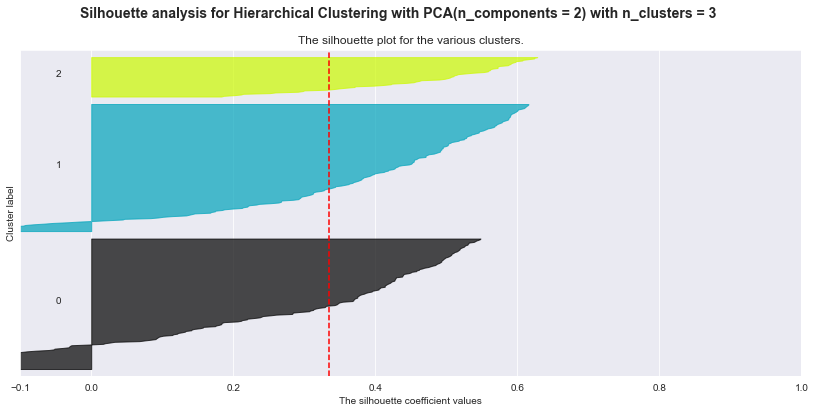

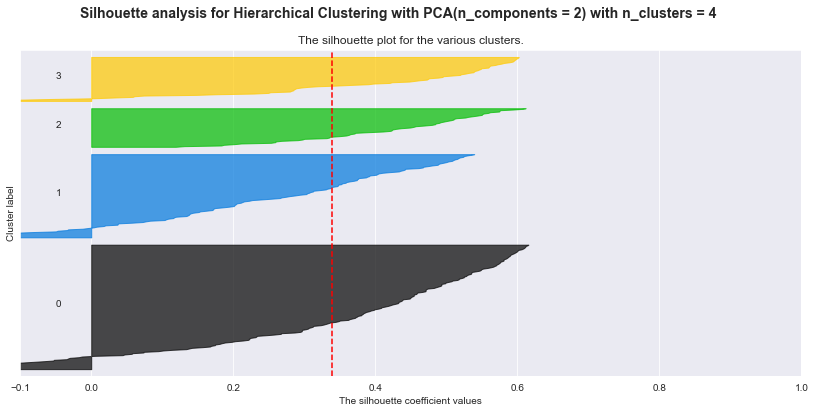

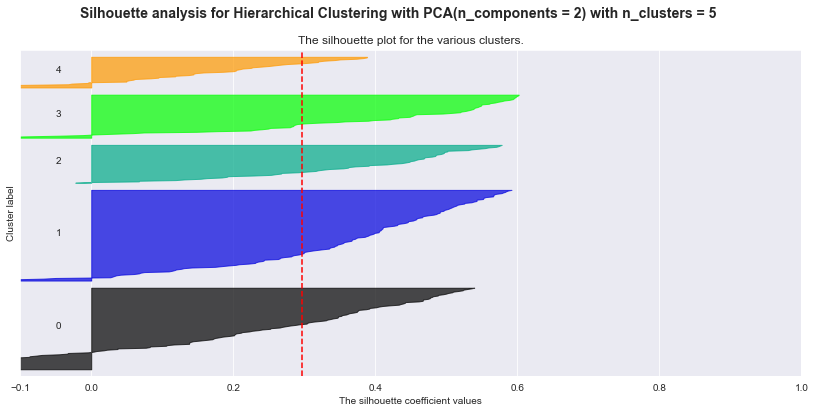

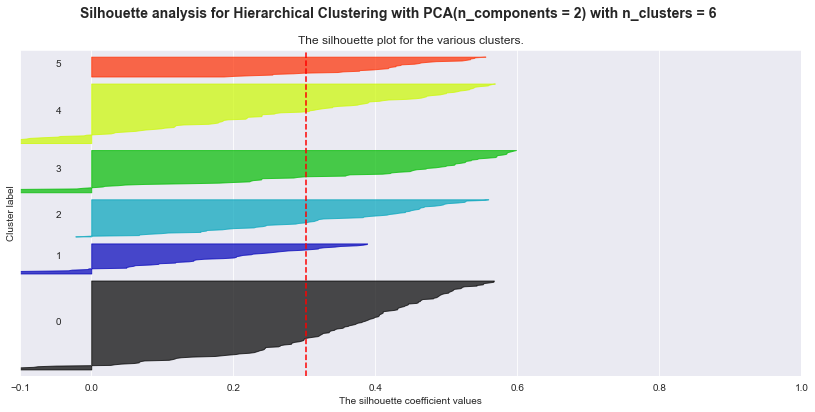

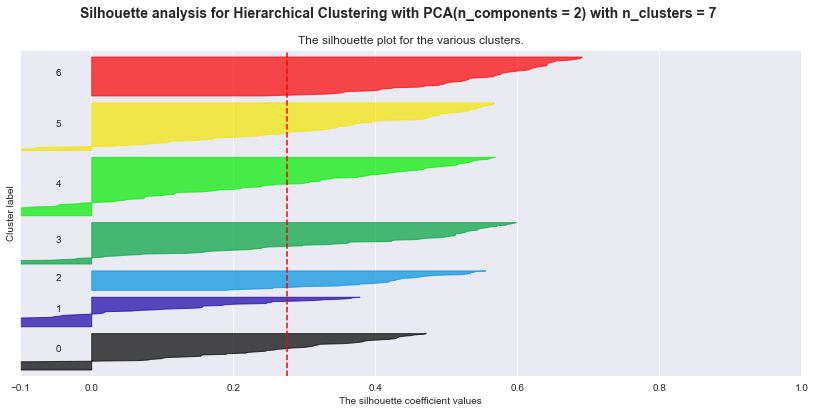

In [37]:
# # Case 2: Agglomerative Clustering with PCA(n_components = 2)
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1  = plt.subplots(1, 1)
    fig.set_size_inches(14, 6)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca1_mod) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(pca1_mod)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca1_mod, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca1_mod, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(
        "Silhouette analysis for Hierarchical Clustering with PCA(n_components = 2) with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In this case of Agglomerative Clustering with PCA(n_components = 2), the silhouette score for 5 and 7 clusters seems to be the least. Based on the thickness of the clusters we can select 7.

In [38]:
# instance creation
#ahc = AgglomerativeClustering(n_clusters=6, linkage ='ward', affinity='euclidean')
# fitting
#labels = ahc.fit_predict(df1)
#labels
#df2 = pd.DataFrame({'Labels':labels})
#df2.dtypes

In [39]:
#pd.crosstab(df2['Labels'],df['Region'])

In [40]:
print('PCA:               Varience Measure=0.95             N_Components=2')
print('Clusters of K_Means:          6                             6  ')
print('Clusters of Dendrogram:       2                             2  ')
print('Clusters of Agglomerative:    6                             7  ')

PCA:               Varience Measure=0.95             N_Components=2
Clusters of K_Means:          6                             6  
Clusters of Dendrogram:       2                             2  
Clusters of Agglomerative:    6                             7  
